# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

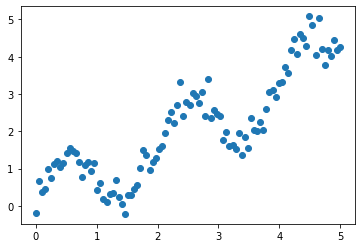

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.510114364088541


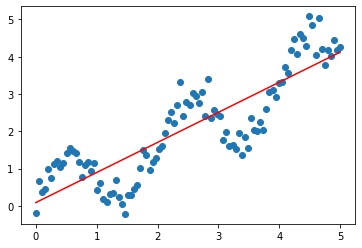

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

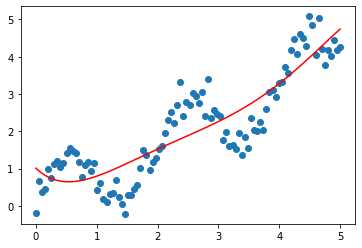

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.54162207  2.00264804 -0.82104566  0.15564561 -0.01064788]
interception:  1.0113482049402958


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.0113482 , 0.93849202, 0.87523182, 0.8209689 , 0.77512804,
       0.73715704, 0.70652632, 0.68272854, 0.66527811, 0.65371083,
       0.64758342, 0.64647315, 0.64997739, 0.65771318, 0.66931685,
       0.68444355, 0.70276688, 0.72397844, 0.74778741, 0.77392015,
       0.80211973, 0.8321456 , 0.86377309, 0.896793  , 0.93101123,
       0.96624831, 1.00233901, 1.03913188, 1.07648888, 1.11428495,
       1.15240755, 1.19075628, 1.22924245, 1.26778866, 1.30632837,
       1.34480551, 1.383174  , 1.42139741, 1.45944848, 1.49730871,
       1.53496798, 1.57242406, 1.60968225, 1.64675495, 1.68366121,
       1.72042635, 1.7570815 , 1.79366321, 1.83021302, 1.86677703,
       1.90340552, 1.94015247, 1.97707519, 2.01423386, 2.05169116,
       2.08951179, 2.1277621 , 2.16650966, 2.20582281, 2.24577028,
       2.28642073, 2.32784238, 2.37010254, 2.41326722, 2.45740071,
       2.50256513, 2.54882007, 2.59622209, 2.64482437, 2.69467626,
       2.74582286, 2.79830459, 2.85215682, 2.90740937, 2.96408

In [15]:
regr_poly.predict(X_poly)

array([1.0113482 , 0.93849202, 0.87523182, 0.8209689 , 0.77512804,
       0.73715704, 0.70652632, 0.68272854, 0.66527811, 0.65371083,
       0.64758342, 0.64647315, 0.64997739, 0.65771318, 0.66931685,
       0.68444355, 0.70276688, 0.72397844, 0.74778741, 0.77392015,
       0.80211973, 0.8321456 , 0.86377309, 0.896793  , 0.93101123,
       0.96624831, 1.00233901, 1.03913188, 1.07648888, 1.11428495,
       1.15240755, 1.19075628, 1.22924245, 1.26778866, 1.30632837,
       1.34480551, 1.383174  , 1.42139741, 1.45944848, 1.49730871,
       1.53496798, 1.57242406, 1.60968225, 1.64675495, 1.68366121,
       1.72042635, 1.7570815 , 1.79366321, 1.83021302, 1.86677703,
       1.90340552, 1.94015247, 1.97707519, 2.01423386, 2.05169116,
       2.08951179, 2.1277621 , 2.16650966, 2.20582281, 2.24577028,
       2.28642073, 2.32784238, 2.37010254, 2.41326722, 2.45740071,
       2.50256513, 2.54882007, 2.59622209, 2.64482437, 2.69467626,
       2.74582286, 2.79830459, 2.85215682, 2.90740937, 2.96408

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

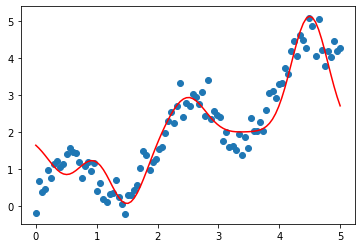

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.04417641 -1.83449525  1.0365935   0.08929234  3.22442222]
interception:  1.9000011172640687


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

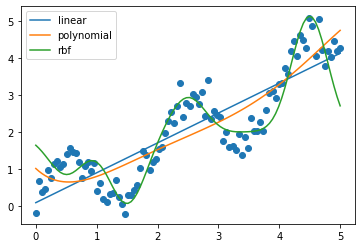

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.510114364088541


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4315292407169506


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26250958973406224
